In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_classification

In [2]:
turnip_data = pd.read_csv('../Database/stonksData.csv')

In [3]:
turnip_data.head()

,Buy Price,Mon AM,Mon PM,Tue AM,Tue PM,Wed AM,Wed PM,Thu AM,Thu PM,Fri AM,Fri PM,Sat AM,Sat PM,Previous Pattern,Pattern
0,NaN,126.0,94.0,107.0,71.0,64.0,146.0,146.0,76.0,70.0,66.0,146.0,146.0,2,0.0
1,NaN,126.0,94.0,107.0,71.0,64.0,53.0,90.0,76.0,70.0,90.0,90.0,90.0,2,0.0
2,NaN,126.0,94.0,107.0,71.0,64.0,53.0,146.0,76.0,70.0,94.0,146.0,146.0,2,0.0
3,NaN,126.0,94.0,107.0,71.0,64.0,53.0,146.0,76.0,70.0,94.0,94.0,94.0,2,0.0
4,107.0,93.0,88.0,85.0,80.0,118.0,208.0,600.0,166.0,100.0,90.0,72.0,97.0,0,2.0


Pattern definition: 
    0: Fluctuating
    1: Small Spike
    2: Large Spike
    3: Decreasing
    4: Unknown

In [4]:
turnip_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 15 columns):
Buy Price           245 non-null float64
Mon AM              249 non-null float64
Mon PM              253 non-null float64
Tue AM              247 non-null float64
Tue PM              251 non-null float64
Wed AM              245 non-null float64
Wed PM              235 non-null float64
Thu AM              229 non-null float64
Thu PM              215 non-null float64
Fri AM              186 non-null float64
Fri PM              164 non-null float64
Sat AM              142 non-null float64
Sat PM              129 non-null float64
Previous Pattern    258 non-null int64
Pattern             255 non-null float64
dtypes: float64(14), int64(1)
memory usage: 30.3 KB


In [5]:
turnip_data.isnull().sum()

Buy Price            13
Mon AM                9
Mon PM                5
Tue AM               11
Tue PM                7
Wed AM               13
Wed PM               23
Thu AM               29
Thu PM               43
Fri AM               72
Fri PM               94
Sat AM              116
Sat PM              129
Previous Pattern      0
Pattern               3
dtype: int64

We can see there are 3 rows with no label. Those are to be extracted from the dataset.

In [6]:
nonLabeled = turnip_data[turnip_data['Pattern'].isnull()]
nonLabeled.head()

,Buy Price,Mon AM,Mon PM,Tue AM,Tue PM,Wed AM,Wed PM,Thu AM,Thu PM,Fri AM,Fri PM,Sat AM,Sat PM,Previous Pattern,Pattern
15,104.0,94.0,89.0,85.0,80.0,113.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
53,103.0,90.0,85.0,71.0,76.0,72.0,69.0,66.0,125.0,156.0,NaN,NaN,NaN,0,NaN
54,110.0,99.0,94.0,91.0,87.0,82.0,79.0,NaN,149.0,166.0,NaN,NaN,NaN,0,NaN


As the amount of feature data they contain is quite enough. Those are going to be saved for later testing

In [7]:
df = turnip_data[turnip_data['Pattern'].notnull()]
df.isnull().sum()

Buy Price            13
Mon AM                9
Mon PM                5
Tue AM               11
Tue PM                7
Wed AM               13
Wed PM               22
Thu AM               27
Thu PM               42
Fri AM               71
Fri PM               91
Sat AM              113
Sat PM              126
Previous Pattern      0
Pattern               0
dtype: int64

Now the data is completely labeled

In [8]:
pattern_classes = ['Fluctuating', 'Small Spike', 'Large Spike', 'Decreasing']
pattern_label   = 'Pattern'
pattern_feature = list(df.columns[df.columns != 'Pattern'])

In [9]:
# sns.pairplot(df, hue='Pattern')

### Preparing the data

In [28]:
df_X, df_y = df[pattern_feature].values, df[pattern_label].values
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y,
                                                   test_size=0.3,
                                                   random_state=0,
                                                   stratify=df_y)
print ('Training Set: %d, Test Set: %d \n' % (X_train.shape[0], X_test.shape[0]))

Training Set: 178, Test Set: 77 



In [29]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='mean')

imp.fit(X_train)
X_train = imp.transform(X_train)
X_test = imp.transform(X_test)

## Training the model

### Support Vector Machine

In [30]:
from sklearn.svm import LinearSVC

svc_Model = LinearSVC(random_state=0, tol=1e-5, max_iter=100000)
svc_Model.fit(X_train, y_train)

C:\Users\Miguel\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=100000,
          multi_class='ovr', penalty='l2', random_state=0, tol=1e-05,
          verbose=0)

In [31]:
predictions = svc_Model.predict(X_test)
print('Predicted labels: ', predictions)
print('Actual labels:    ' ,y_test)

from sklearn.metrics import precision_score, recall_score
from sklearn. metrics import classification_report
from sklearn.metrics import accuracy_score

print('Accuracy: ', accuracy_score(y_test, predictions))

print(classification_report(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions, average='macro'))
print("Overall Recall:",recall_score(y_test, predictions, average='macro'))

Predicted labels:  [0. 2. 0. 2. 0. 2. 0. 0. 2. 3. 0. 0. 0. 0. 2. 0. 0. 0. 2. 0. 2. 0. 0. 0.
 0. 2. 3. 3. 0. 3. 0. 2. 0. 0. 0. 0. 3. 0. 0. 0. 2. 0. 2. 2. 0. 0. 2. 0.
 0. 0. 0. 3. 0. 3. 2. 3. 3. 0. 0. 3. 2. 0. 0. 0. 0. 2. 0. 3. 0. 0. 1. 0.
 0. 3. 1. 0. 2.]
Actual labels:     [0. 2. 1. 2. 0. 2. 0. 0. 2. 3. 0. 0. 3. 2. 2. 0. 0. 1. 2. 1. 1. 1. 1. 2.
 0. 2. 3. 3. 0. 0. 1. 1. 0. 1. 1. 2. 1. 1. 0. 1. 2. 1. 2. 2. 0. 0. 2. 2.
 0. 1. 0. 3. 0. 3. 2. 0. 3. 1. 1. 3. 2. 0. 0. 0. 1. 2. 0. 3. 1. 2. 1. 0.
 2. 3. 1. 0. 2.]
Accuracy:  0.6363636363636364
              precision    recall  f1-score   support

         0.0       0.50      0.92      0.65        25
         1.0       1.00      0.10      0.17        21
         2.0       0.88      0.71      0.79        21
         3.0       0.75      0.90      0.82        10

    accuracy                           0.64        77
   macro avg       0.78      0.66      0.61        77
weighted avg       0.77      0.64      0.58        77

Overall Precision: 0.7830

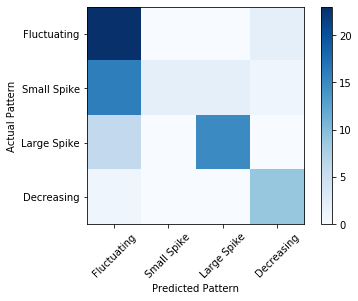

In [32]:
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
mcm = confusion_matrix(y_test, predictions)
plt.imshow(mcm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(pattern_classes))
plt.xticks(tick_marks, pattern_classes, rotation=45)
plt.yticks(tick_marks, pattern_classes)
plt.xlabel("Predicted Pattern")
plt.ylabel("Actual Pattern")
plt.show()

## Nearest Neighbors

In [33]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=4)
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [34]:
neigh_pred = neigh.predict(X_test)
print('Predicted labels: ', predictions)
print('Actual labels:    ' ,y_test)

print('Accuracy: ', accuracy_score(y_test, neigh_pred))

print(classification_report(y_test, neigh_pred))
print("Overall Precision:",precision_score(y_test, neigh_pred, average='macro'))
print("Overall Recall:",recall_score(y_test, neigh_pred, average='macro'))

Predicted labels:  [0. 2. 0. 2. 0. 2. 0. 0. 2. 3. 0. 0. 0. 0. 2. 0. 0. 0. 2. 0. 2. 0. 0. 0.
 0. 2. 3. 3. 0. 3. 0. 2. 0. 0. 0. 0. 3. 0. 0. 0. 2. 0. 2. 2. 0. 0. 2. 0.
 0. 0. 0. 3. 0. 3. 2. 3. 3. 0. 0. 3. 2. 0. 0. 0. 0. 2. 0. 3. 0. 0. 1. 0.
 0. 3. 1. 0. 2.]
Actual labels:     [0. 2. 1. 2. 0. 2. 0. 0. 2. 3. 0. 0. 3. 2. 2. 0. 0. 1. 2. 1. 1. 1. 1. 2.
 0. 2. 3. 3. 0. 0. 1. 1. 0. 1. 1. 2. 1. 1. 0. 1. 2. 1. 2. 2. 0. 0. 2. 2.
 0. 1. 0. 3. 0. 3. 2. 0. 3. 1. 1. 3. 2. 0. 0. 0. 1. 2. 0. 3. 1. 2. 1. 0.
 2. 3. 1. 0. 2.]
Accuracy:  0.8571428571428571
              precision    recall  f1-score   support

         0.0       0.84      0.84      0.84        25
         1.0       0.85      0.81      0.83        21
         2.0       1.00      0.86      0.92        21
         3.0       0.71      1.00      0.83        10

    accuracy                           0.86        77
   macro avg       0.85      0.88      0.86        77
weighted avg       0.87      0.86      0.86        77

Overall Precision: 0.8510

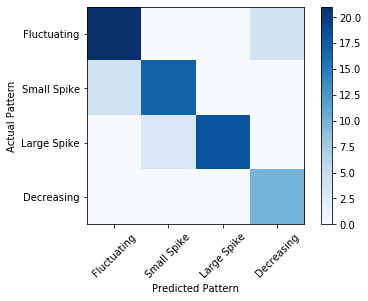

In [35]:
# Print the confusion matrix
mcm = confusion_matrix(y_test, neigh_pred)
plt.imshow(mcm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(pattern_classes))
plt.xticks(tick_marks, pattern_classes, rotation=45)
plt.yticks(tick_marks, pattern_classes)
plt.xlabel("Predicted Pattern")
plt.ylabel("Actual Pattern")
plt.show()

## Random Forest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier

forestClass = RandomForestClassifier(n_estimators=100)
forestClass.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [37]:
forest_pred = forestClass.predict(X_test)
print('Predicted labels: ', predictions)
print('Actual labels:    ' ,y_test)

print('Accuracy: ', accuracy_score(y_test, forest_pred))

print(classification_report(y_test, forest_pred))
print("Overall Precision:",precision_score(y_test, forest_pred, average='macro'))
print("Overall Recall:",recall_score(y_test, forest_pred, average='macro'))

Predicted labels:  [0. 2. 0. 2. 0. 2. 0. 0. 2. 3. 0. 0. 0. 0. 2. 0. 0. 0. 2. 0. 2. 0. 0. 0.
 0. 2. 3. 3. 0. 3. 0. 2. 0. 0. 0. 0. 3. 0. 0. 0. 2. 0. 2. 2. 0. 0. 2. 0.
 0. 0. 0. 3. 0. 3. 2. 3. 3. 0. 0. 3. 2. 0. 0. 0. 0. 2. 0. 3. 0. 0. 1. 0.
 0. 3. 1. 0. 2.]
Actual labels:     [0. 2. 1. 2. 0. 2. 0. 0. 2. 3. 0. 0. 3. 2. 2. 0. 0. 1. 2. 1. 1. 1. 1. 2.
 0. 2. 3. 3. 0. 0. 1. 1. 0. 1. 1. 2. 1. 1. 0. 1. 2. 1. 2. 2. 0. 0. 2. 2.
 0. 1. 0. 3. 0. 3. 2. 0. 3. 1. 1. 3. 2. 0. 0. 0. 1. 2. 0. 3. 1. 2. 1. 0.
 2. 3. 1. 0. 2.]
Accuracy:  0.8831168831168831
              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96        25
         1.0       0.88      0.71      0.79        21
         2.0       0.77      0.95      0.85        21
         3.0       0.91      1.00      0.95        10

    accuracy                           0.88        77
   macro avg       0.89      0.90      0.89        77
weighted avg       0.89      0.88      0.88        77

Overall Precision: 0.8901

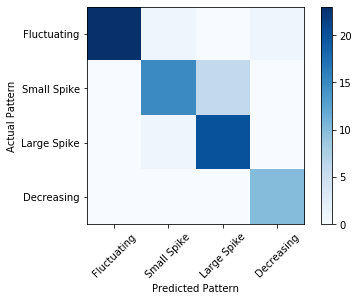

In [38]:
# Print the confusion matrix
mcm = confusion_matrix(y_test, forest_pred)
plt.imshow(mcm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(pattern_classes))
plt.xticks(tick_marks, pattern_classes, rotation=45)
plt.yticks(tick_marks, pattern_classes)
plt.xlabel("Predicted Pattern")
plt.ylabel("Actual Pattern")
plt.show()